o3f: 1134016 points
3527 unique sequences
174532 unique compounds
984877 hits
149139 misses


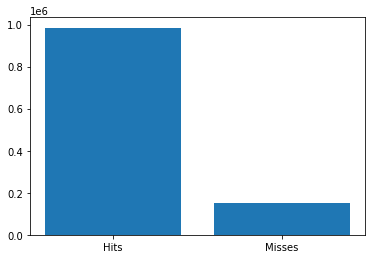

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

o3f = pd.read_csv('model-data/o3f.csv')
print(f"o3f: {len(o3f)} points\n{len(o3f['seq'].unique())} unique sequences\n{len(o3f['smiles'].unique())} unique compounds")
nhits = sum(o3f['hit'])
nmisses = len(o3f) - nhits 
print(f"{nhits} hits\n{nmisses} misses")

plt.bar(x=['Hits','Misses'],
        height=[nhits, nmisses],
       )
plt.show()

In [2]:
149139 / (984877  + 149139)

0.1315140174389074

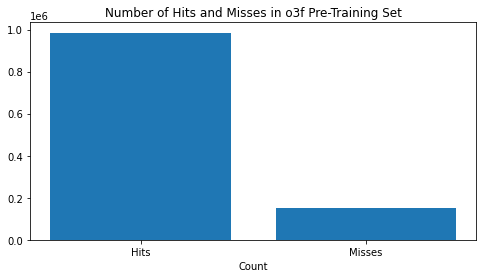

In [3]:
plt.figure(figsize=(8,4))
plt.bar(x=['Hits','Misses'],
        height=[nhits, nmisses],
       )
plt.xlabel('Count')
plt.title('Number of Hits and Misses in o3f Pre-Training Set')
plt.savefig('img/o3f-hits-hist.png')
plt.show()

In [ ]:
%%time
import os
from tqdm import tqdm
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Crippen 



feature_fns = [
        'CalcLabuteASA', 'CalcTPSA', 'CalcExactMolWt',
        'CalcNumLipinskiHBD', 'CalcNumLipinskiHBA', 'CalcNumHBD', 'CalcNumHBA',
        'CalcNumRotatableBonds', 'CalcNumRings', 'CalcNumAromaticRings',
        'CalcNumSaturatedRings', 'CalcNumHeterocycles', 'CalcNumAromaticHeterocycles',
        'CalcNumAromaticCarbocycles', 'CalcNumSaturatedHeterocycles',
        'CalcNumSaturatedCarbocycles', 'CalcNumAliphaticRings',
        'CalcNumAliphaticHeterocycles', 'CalcNumAliphaticCarbocycles', 'CalcNumHeteroatoms',
        'CalcNumAmideBonds', 'CalcFractionCSP3', 'CalcChi0v', 'CalcChi1v', 'CalcChi2v', 'CalcChi3v',
        'CalcChi4v', 'CalcChi0n', 'CalcChi1n', 'CalcChi2n', 'CalcChi3n', 'CalcChi4n', 'CalcHallKierAlpha',
        'CalcKappa1', 'CalcKappa2', 'CalcKappa3', 'CalcNumSpiroAtoms', 'CalcNumBridgeheadAtoms',
        'MolLogP'
        ]

feature_fns =  [i for i in feature_fns if i in Chem.__dict__ or i in Crippen.__dict__]

_fn = lambda mol, fn_name : Chem.__dict__[fn_name](mol) if fn_name in Chem.__dict__ else Crippen.__dict__[fn_name](mol)
fn = lambda mol : {fn_name.replace('Calc',''):_fn(mol, fn_name) for fn_name in feature_fns} 

props_path = 'o3f-props.csv'

if not os.path.exists(props_path):
    _props = {}
    for i in tqdm(o3f['smiles']):
        m = Chem.MolFromSmiles(i)
        mh = Chem.AddHs(m)
        _props[i] = fn(mh)
    props = pd.DataFrame(_props).T
    props.to_csv(props_path, index=False)
else:
    props = pd.read_csv(props_path)
props.head()

  1%|▌                                                                               | 7297/1134016 [00:19<52:33, 357.29it/s]